# Senior Project

In [35]:
from emnist import list_datasets
import numpy as np
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [36]:
from emnist import extract_test_samples
from emnist import extract_training_samples

X_train, y_train = extract_training_samples('byclass')
X_test, y_test = extract_test_samples('byclass')
max = np.max(y_train)

print('Training Shape: ', X_train.shape)
print('Testing Shape: ', X_test.shape)
print('Training Label Shape: ', y_train.shape)
print('Testing Label Shape: ', y_test.shape)
print('Number of classes: ', max + 1)

Training Shape:  (697932, 28, 28)
Testing Shape:  (116323, 28, 28)
Training Label Shape:  (697932,)
Testing Label Shape:  (116323,)
Number of classes:  62


Normalizing and Scaling the Pixels to Black and White 

In [37]:
X_train = X_train/255
X_test= X_test/255
print(np.max(X_train))
print(np.min(X_train))
print(np.max(X_test))
print(np.min(X_test))


1.0
0.0
1.0
0.0


#### Reshaping the data to create a 4D tensor

In [38]:
X_train = X_train.reshape(697932, 28, 28, 1)
X_test = X_test.reshape(116323, 28, 28, 1)

print('Data Set Info: \n')
print('Training Shape: ', X_train.shape)
print('Testing Shape: ', X_test.shape)
print('Training Label Shape: ', y_train.shape)
print('Testing Label Shape: ', y_test.shape)

max = np.max(y_train)
print('Number of classes: ', max + 1)

Data Set Info: 

Training Shape:  (697932, 28, 28, 1)
Testing Shape:  (116323, 28, 28, 1)
Training Label Shape:  (697932,)
Testing Label Shape:  (116323,)
Number of classes:  62


#### Categorizing the Labels

In [39]:
from keras.utils import np_utils
NB_CLASSES = max + 1
print('Shape of y_train and y_test before categorizing: ')
print(y_train.shape)
print(y_test.shape)

Shape of y_train and y_test before categorizing: 
(697932,)
(116323,)


In [40]:
print('Shape of y_train and y_test after categorizing: ')
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

print(y_train.shape)
print(y_test.shape)

Shape of y_train and y_test after categorizing: 
(697932, 62)
(116323, 62)


In [41]:
classes = ['0','1','2','3','4','5','6','7','8','9',
           'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
           'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

Label:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


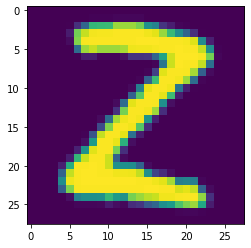

In [42]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])
print('Label: ', y_train[0])

####  Building the CNN Model

In [45]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

In [47]:
NB_EPOCH = 10
BATCH_SIZE = 30
VERBOSE = 2
NB_CLASSES = 62
#OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2
METRICS = ['accuracy']
LOSS = 'categorical_crossentropy'

input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])
input_shape

(28, 28, 1)

# Model 1

In [50]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), 
                 activation = 'relu',
                 input_shape = input_shape))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128,(3,3), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(62, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

history = model.fit(X_train, y_train,
                   BATCH_SIZE,
                   NB_EPOCH,
                   VERBOSE,
                   validation_data = (X_test, y_test))

In [52]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
             metrics =['accuracy'])

In [53]:
history = model.fit(X_train, y_train,
                   BATCH_SIZE,
                   NB_EPOCH,
                   VERBOSE,
                   validation_data = (X_test, y_test))

Epoch 1/10
23265/23265 - 212s - loss: 0.8191 - accuracy: 0.7452 - val_loss: 0.4995 - val_accuracy: 0.8285
Epoch 2/10
23265/23265 - 213s - loss: 0.6164 - accuracy: 0.7980 - val_loss: 0.4759 - val_accuracy: 0.8354
Epoch 3/10
23265/23265 - 213s - loss: 0.5810 - accuracy: 0.8078 - val_loss: 0.4684 - val_accuracy: 0.8369
Epoch 4/10
23265/23265 - 214s - loss: 0.5641 - accuracy: 0.8126 - val_loss: 0.4567 - val_accuracy: 0.8411
Epoch 5/10
23265/23265 - 208s - loss: 0.5541 - accuracy: 0.8150 - val_loss: 0.4461 - val_accuracy: 0.8444
Epoch 6/10
23265/23265 - 204s - loss: 0.5508 - accuracy: 0.8166 - val_loss: 0.4480 - val_accuracy: 0.8446
Epoch 7/10
23265/23265 - 204s - loss: 0.5475 - accuracy: 0.8174 - val_loss: 0.4542 - val_accuracy: 0.8429
Epoch 8/10
23265/23265 - 203s - loss: 0.5453 - accuracy: 0.8180 - val_loss: 0.4565 - val_accuracy: 0.8417
Epoch 9/10
23265/23265 - 205s - loss: 0.5421 - accuracy: 0.8190 - val_loss: 0.4551 - val_accuracy: 0.8420
Epoch 10/10
23265/23265 - 204s - loss: 0.5399 

In [56]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc

3636/3636 [==============================] - 10s 3ms/step - loss: 0.4521 - accuracy: 0.8432


0.8432468175888062

In [57]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


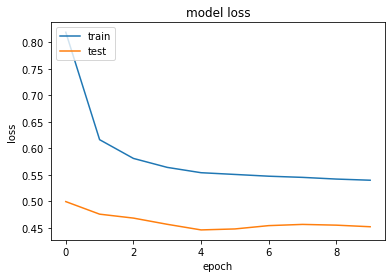

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 2

In [126]:
model2 = Sequential()

model2.add(Conv2D(64, kernel_size = (3, 3), 
                 activation = 'relu',
                 input_shape = input_shape))

model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation = 'relu'))

model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(256,(3,3), activation = 'relu'))

model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Flatten())

model2.add(Dropout(0.5))

model2.add(Dense(62, activation = 'softmax'))

model2.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 256)             

In [127]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
             metrics =['accuracy'])

In [143]:
history2 = model2.fit(X_train, y_train,
                   BATCH_SIZE,
                   NB_EPOCH,
                   VERBOSE,
                   validation_data = (X_test, y_test))

Epoch 1/10
23265/23265 - 448s - loss: 0.6943 - accuracy: 0.7772 - val_loss: 0.4662 - val_accuracy: 0.8366
Epoch 2/10
23265/23265 - 446s - loss: 0.5333 - accuracy: 0.8198 - val_loss: 0.4387 - val_accuracy: 0.8445
Epoch 3/10
23265/23265 - 455s - loss: 0.5045 - accuracy: 0.8279 - val_loss: 0.4352 - val_accuracy: 0.8460
Epoch 4/10
23265/23265 - 460s - loss: 0.4923 - accuracy: 0.8313 - val_loss: 0.4306 - val_accuracy: 0.8478
Epoch 5/10
23265/23265 - 465s - loss: 0.4845 - accuracy: 0.8336 - val_loss: 0.4315 - val_accuracy: 0.8481
Epoch 6/10
23265/23265 - 466s - loss: 0.4800 - accuracy: 0.8347 - val_loss: 0.4369 - val_accuracy: 0.8459
Epoch 7/10
23265/23265 - 469s - loss: 0.4756 - accuracy: 0.8355 - val_loss: 0.4376 - val_accuracy: 0.8474
Epoch 8/10
23265/23265 - 475s - loss: 0.4745 - accuracy: 0.8359 - val_loss: 0.4312 - val_accuracy: 0.8497
Epoch 9/10
23265/23265 - 462s - loss: 0.4731 - accuracy: 0.8367 - val_loss: 0.4298 - val_accuracy: 0.8492
Epoch 10/10
23265/23265 - 461s - loss: 0.4730 

In [144]:
test_loss, test_acc = model2.evaluate(X_test, y_test)
test_acc

3636/3636 [==============================] - 21s 6ms/step - loss: 0.4373 - accuracy: 0.8475


0.8474850058555603

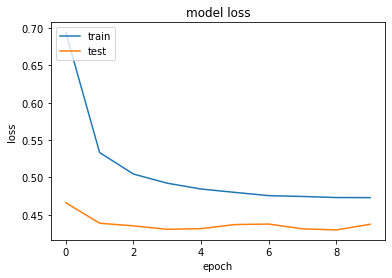

In [145]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 3

In [151]:
model3 = Sequential()

model3.add(Conv2D(64, kernel_size = (3, 3), 
                 activation = 'relu',
                 input_shape = input_shape))

model3.add(MaxPooling2D(pool_size = (2, 2)))

model3.add(Conv2D(128, (3, 3), activation = 'relu'))

model3.add(MaxPooling2D(pool_size = (2, 2)))

model3.add(Conv2D(256,(3,3), activation = 'relu'))

model3.add(MaxPooling2D(pool_size = (2, 2)))

model3.add(Flatten())

model3.add(Dropout(0.5))

model3.add(Dense(62, activation = 'softmax'))

model3.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_118 (Conv2D)          (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 256)             

In [152]:
NEW_BATCH_SIZE = 50

In [153]:
model3.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
             metrics =['accuracy'])

In [154]:
history3 = model3.fit(X_train, y_train,
                   NEW_BATCH_SIZE,
                   NB_EPOCH,
                   VERBOSE,
                   validation_data = (X_test, y_test))

Epoch 1/10
13959/13959 - 410s - loss: 0.7000 - accuracy: 0.7759 - val_loss: 0.4601 - val_accuracy: 0.8388
Epoch 2/10
13959/13959 - 411s - loss: 0.5282 - accuracy: 0.8210 - val_loss: 0.4337 - val_accuracy: 0.8462
Epoch 3/10
13959/13959 - 410s - loss: 0.4948 - accuracy: 0.8306 - val_loss: 0.4245 - val_accuracy: 0.8489
Epoch 4/10
13959/13959 - 411s - loss: 0.4785 - accuracy: 0.8346 - val_loss: 0.4211 - val_accuracy: 0.8499
Epoch 5/10
13959/13959 - 411s - loss: 0.4682 - accuracy: 0.8371 - val_loss: 0.4131 - val_accuracy: 0.8527
Epoch 6/10
13959/13959 - 410s - loss: 0.4613 - accuracy: 0.8390 - val_loss: 0.4135 - val_accuracy: 0.8520
Epoch 7/10
13959/13959 - 409s - loss: 0.4552 - accuracy: 0.8408 - val_loss: 0.4151 - val_accuracy: 0.8517
Epoch 8/10
13959/13959 - 411s - loss: 0.4504 - accuracy: 0.8421 - val_loss: 0.4146 - val_accuracy: 0.8525
Epoch 9/10
13959/13959 - 410s - loss: 0.4469 - accuracy: 0.8427 - val_loss: 0.4143 - val_accuracy: 0.8533
Epoch 10/10
13959/13959 - 410s - loss: 0.4443 

In [155]:
test_loss, test_acc = model3.evaluate(X_test, y_test)
test_acc

3636/3636 [==============================] - 22s 6ms/step - loss: 0.4112 - accuracy: 0.8531


0.8530728816986084

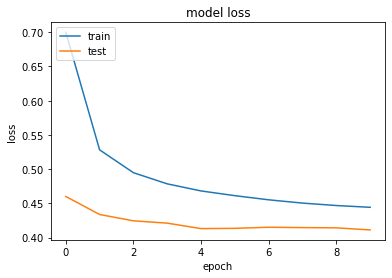

In [156]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 4

In [157]:
model4 = Sequential()

model4.add(Conv2D(64, kernel_size = (3, 3), 
                 activation = 'relu',
                 input_shape = input_shape))

model4.add(MaxPooling2D(pool_size = (2, 2)))

model4.add(Dropout(0.25))

model4.add(Conv2D(128, (3, 3), activation = 'relu'))

model4.add(MaxPooling2D(pool_size = (2, 2)))

model4.add(Conv2D(256,(3,3), activation = 'relu'))

model4.add(MaxPooling2D(pool_size = (2, 2)))

model4.add(Flatten())

model4.add(Dropout(0.25))

model4.add(Dense(62, activation = 'softmax'))

model4.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_109 (MaxPoolin (None, 1, 1, 256)       

In [159]:
model4.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
             metrics =['accuracy'])

In [160]:
history4 = model4.fit(X_train, y_train,
                   NEW_BATCH_SIZE,
                   NB_EPOCH,
                   VERBOSE,
                   validation_data = (X_test, y_test))

Epoch 1/10
13959/13959 - 475s - loss: 0.6387 - accuracy: 0.7911 - val_loss: 0.4779 - val_accuracy: 0.8322
Epoch 2/10
13959/13959 - 447s - loss: 0.4928 - accuracy: 0.8290 - val_loss: 0.4312 - val_accuracy: 0.8456
Epoch 3/10
13959/13959 - 445s - loss: 0.4661 - accuracy: 0.8364 - val_loss: 0.4213 - val_accuracy: 0.8489
Epoch 4/10
13959/13959 - 442s - loss: 0.4530 - accuracy: 0.8395 - val_loss: 0.4153 - val_accuracy: 0.8508
Epoch 5/10
13959/13959 - 442s - loss: 0.4437 - accuracy: 0.8421 - val_loss: 0.4141 - val_accuracy: 0.8513
Epoch 6/10
13959/13959 - 438s - loss: 0.4369 - accuracy: 0.8440 - val_loss: 0.4146 - val_accuracy: 0.8502
Epoch 7/10
13959/13959 - 442s - loss: 0.4324 - accuracy: 0.8455 - val_loss: 0.4103 - val_accuracy: 0.8530
Epoch 8/10
13959/13959 - 438s - loss: 0.4287 - accuracy: 0.8465 - val_loss: 0.4127 - val_accuracy: 0.8522
Epoch 9/10
13959/13959 - 439s - loss: 0.4260 - accuracy: 0.8471 - val_loss: 0.4084 - val_accuracy: 0.8533
Epoch 10/10
13959/13959 - 433s - loss: 0.4230 

In [161]:
test_loss, test_acc = model4.evaluate(X_test, y_test)
test_acc

3636/3636 [==============================] - 20s 6ms/step - loss: 0.4116 - accuracy: 0.8522


0.8522390127182007

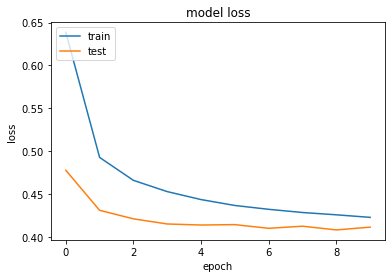

In [162]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 5

In [163]:
model5 = Sequential()

model5.add(Conv2D(32, kernel_size = (3, 3), 
                 activation = 'relu',
                 input_shape = input_shape))

model5.add(MaxPooling2D(pool_size = (2, 2)))

model5.add(Dropout(0.25))

model5.add(Conv2D(64, (3, 3), activation = 'relu'))

model5.add(MaxPooling2D(pool_size = (2, 2)))

model5.add(Conv2D(128,(3,3), activation = 'relu'))

model5.add(MaxPooling2D(pool_size = (2, 2)))

model5.add(Flatten())

model5.add(Dropout(0.25))

model5.add(Dense(62, activation = 'softmax'))

model5.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_124 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 1, 1, 128)       

In [164]:
model5.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
             metrics =['accuracy'])

In [165]:
history5 = model5.fit(X_train, y_train,
                   NEW_BATCH_SIZE,
                   NB_EPOCH,
                   VERBOSE,
                   validation_data = (X_test, y_test))

Epoch 1/10
13959/13959 - 226s - loss: 0.7361 - accuracy: 0.7654 - val_loss: 0.4878 - val_accuracy: 0.8308
Epoch 2/10
13959/13959 - 228s - loss: 0.5484 - accuracy: 0.8143 - val_loss: 0.4575 - val_accuracy: 0.8408
Epoch 3/10
13959/13959 - 238s - loss: 0.5203 - accuracy: 0.8221 - val_loss: 0.4537 - val_accuracy: 0.8383
Epoch 4/10
13959/13959 - 237s - loss: 0.5058 - accuracy: 0.8256 - val_loss: 0.4432 - val_accuracy: 0.8435
Epoch 5/10
13959/13959 - 236s - loss: 0.4964 - accuracy: 0.8286 - val_loss: 0.4429 - val_accuracy: 0.8443
Epoch 6/10
13959/13959 - 237s - loss: 0.4902 - accuracy: 0.8302 - val_loss: 0.4363 - val_accuracy: 0.8459
Epoch 7/10
13959/13959 - 237s - loss: 0.4859 - accuracy: 0.8315 - val_loss: 0.4378 - val_accuracy: 0.8441
Epoch 8/10
13959/13959 - 238s - loss: 0.4825 - accuracy: 0.8324 - val_loss: 0.4299 - val_accuracy: 0.8466
Epoch 9/10
13959/13959 - 238s - loss: 0.4799 - accuracy: 0.8332 - val_loss: 0.4297 - val_accuracy: 0.8472
Epoch 10/10
13959/13959 - 241s - loss: 0.4780 

In [166]:
test_loss, test_acc = model5.evaluate(X_test, y_test)
test_acc

3636/3636 [==============================] - 11s 3ms/step - loss: 0.4272 - accuracy: 0.8484


0.8484306335449219

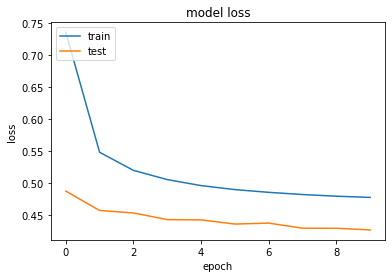

In [167]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# FINAL MODEL

In [168]:
model6 = Sequential()

model6.add(Conv2D(64, kernel_size = (3, 3), 
                 activation = 'relu',
                 input_shape = input_shape))

model6.add(MaxPooling2D(pool_size = (2, 2)))

model6.add(Dropout(0.25))

model6.add(Conv2D(128, (3, 3), activation = 'relu'))

model6.add(MaxPooling2D(pool_size = (2, 2)))

model6.add(Conv2D(256,(3,3), activation = 'relu'))

model6.add(MaxPooling2D(pool_size = (2, 2)))

model6.add(Flatten())

model6.add(Dropout(0.25))

model6.add(Dense(62, activation = 'softmax'))

model6.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 1, 1, 256)       

In [169]:
model6.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
             metrics =['accuracy'])

In [170]:
NEW_NB_EPOCH = 20

In [172]:
history6 = model6.fit(X_train, y_train,
                   NEW_BATCH_SIZE,
                   NEW_NB_EPOCH,
                   VERBOSE,
                   validation_data = (X_test, y_test))

Epoch 1/20
13959/13959 - 454s - loss: 0.6295 - accuracy: 0.7923 - val_loss: 0.4561 - val_accuracy: 0.8404
Epoch 2/20
13959/13959 - 461s - loss: 0.4905 - accuracy: 0.8301 - val_loss: 0.4317 - val_accuracy: 0.8463
Epoch 3/20
13959/13959 - 459s - loss: 0.4643 - accuracy: 0.8366 - val_loss: 0.4227 - val_accuracy: 0.8482
Epoch 4/20
13959/13959 - 452s - loss: 0.4503 - accuracy: 0.8407 - val_loss: 0.4232 - val_accuracy: 0.8485
Epoch 5/20
13959/13959 - 454s - loss: 0.4429 - accuracy: 0.8426 - val_loss: 0.4178 - val_accuracy: 0.8498
Epoch 6/20
13959/13959 - 456s - loss: 0.4354 - accuracy: 0.8445 - val_loss: 0.4126 - val_accuracy: 0.8514
Epoch 7/20
13959/13959 - 461s - loss: 0.4306 - accuracy: 0.8456 - val_loss: 0.4118 - val_accuracy: 0.8524
Epoch 8/20
13959/13959 - 460s - loss: 0.4268 - accuracy: 0.8465 - val_loss: 0.4131 - val_accuracy: 0.8527
Epoch 9/20
13959/13959 - 465s - loss: 0.4235 - accuracy: 0.8476 - val_loss: 0.4090 - val_accuracy: 0.8535
Epoch 10/20
13959/13959 - 471s - loss: 0.4217 

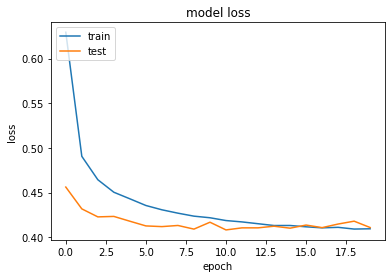

In [173]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# SAMPLE IMAGES

[29]


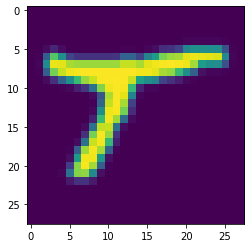

In [240]:
test_image = X_test[3500]

test_image = np.array(test_image)
test_image = test_image.reshape(1,28,28,1)
prediction = model4.predict_classes(test_image)

print(prediction)
plt.imshow(X_test[3500])

In [241]:
classes[29]

'T'

[4]


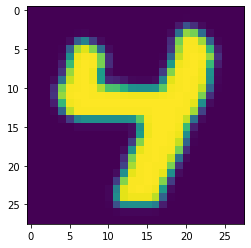

In [223]:
test_image = X_test[500]

test_image = np.array(test_image)
test_image = test_image.reshape(1,28,28,1)
prediction = model4.predict_classes(test_image)

print(prediction)
plt.imshow(X_test[500])

In [224]:
classes[4]

'4'

[39]


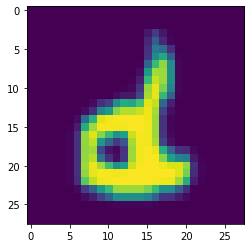

In [225]:
test_image = X_test[10000]

test_image = np.array(test_image)
test_image = test_image.reshape(1,28,28,1)
prediction = model4.predict_classes(test_image)

print(prediction)
plt.imshow(X_test[10000])

In [226]:
classes[39]

'd'